In [1]:
using POMDPs
using POMDPModels
using POMDPSimulators
using SARSOP
using QMDP
using BasicPOMCP
using DMUStudent
using DMUStudent.HW6

┌ Info: Precompiling SARSOP [cef570c6-3a94-5604-96b7-1a5e143043f2]
└ @ Base loading.jl:1273
┌ Info: Precompiling DMUStudent [a176809d-bc77-421e-b60b-7b215d415e6e]
└ @ Base loading.jl:1273


# Problem 2

For this starter code, I'll show how to use QMDP and SARSOP to solve the crying baby problem.

In [2]:
m = BabyPOMDP()

BabyPOMDP(-5.0, -10.0, 0.1, 0.8, 0.1, 0.9)

In [3]:
results = Dict{String, Float64}()
for (key, solver) in ["SARSOP"=>SARSOPSolver(), "QMDP"=>QMDPSolver()]
    policy = solve(solver, m)
    N = 10000
    rsum = 0.0
    for i in 1:N
        rsum += simulate(RolloutSimulator(max_steps=500), m, policy)
    end
    results[key] = rsum/N
end;

Generating a pomdpx file: model.pomdpx

Loading the model ...
  input file   : model.pomdpx
  loading time : 0.00s 

SARSOP initializing ...
  initialization time : 0.00s

-------------------------------------------------------------------------------
 Time   |#Trial |#Backup |LBound    |UBound    |Precision  |#Alphas |#Beliefs  
-------------------------------------------------------------------------------
 0       0       0        -47.3685   -16.0713   31.2971     2        1        
 0       5       51       -17.9323   -16.0492   1.88318     9        6        
 0       10      103      -16.3978   -16.2159   0.181953    2        8        
 0       14      151      -16.3124   -16.277    0.0353847   2        13       
 0       18      207      -16.3058   -16.2969   0.00887227  2        16       
 0       21      250      -16.3055   -16.3022   0.00329006  7        16       
 0       25      305      -16.3055   -16.3044   0.00111584  2        18       
 0       26      323      -16.3055 

In [4]:
@show results

results = Dict("QMDP" => -16.401001701752342,"SARSOP" => -16.265551600479565)


Dict{String,Float64} with 2 entries:
  "QMDP"   => -16.401
  "SARSOP" => -16.2656

# Problem 3

This will show how to use POMCP on the lasertag problem. You can either submit a `POMDPs.Policy` object or a `(policy, updater)` Tuple. For updaters, see the [BeliefUpdaters.jl](https://github.com/JuliaPOMDP/BeliefUpdaters.jl) and [ParticleFilters.jl](https://github.com/JuliaPOMDP/ParticleFilters.jl) packages, especially [the tutorial for use with POMDPs.jl](https://github.com/JuliaPOMDP/ParticleFilters.jl/blob/master/notebooks/Using-a-Particle-Filter-with-POMDPs-jl.ipynb). Note that you can solve this problem with off-the-shelf belief updaters, so before spending any time customizing/hacking the belief update, I recommend asking on Piazza.

In [5]:
planner = solve(POMCPSolver(tree_queries=2000, max_time=0.001), lasertag);

In [7]:
DMUStudent.evaluate(
    planner, 
    "hw6",
    n_episodes=100  # note for submission, you will need 1000 episodes, I just lowered it to run faster. I got a score of 45 with a policy that took about 10 minutes to evaluate
)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


Evaluation complete! Score: -12.97487921950427


-12.97487921950427

## Visualization

You can use the DisplaySimulator to display a simulation of your policy to see how well it is doing.

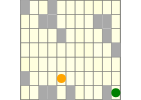

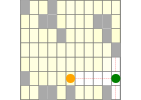

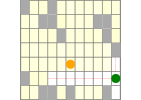

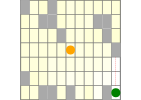

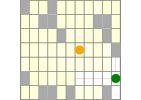

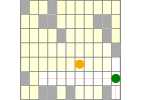

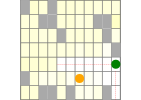

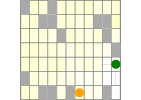

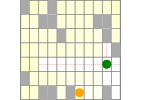

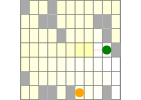

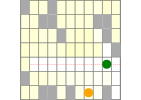

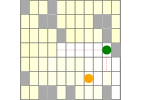

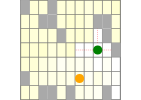

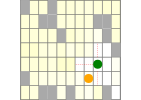

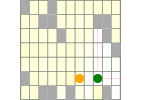

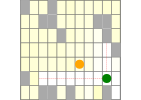

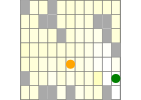

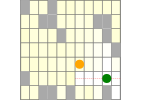

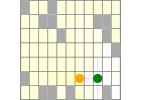

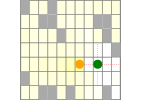

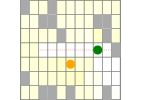

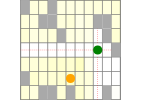

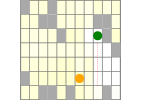

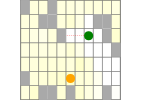

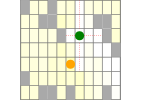

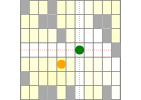

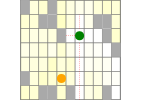

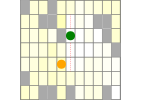

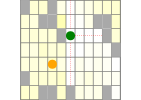

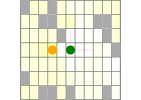

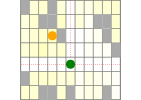

-27.610212313116282

In [10]:
ds = DisplaySimulator(max_steps=30, extra_final=false, extra_initial=true)
simulate(ds, lasertag, planner)